In [1]:
# Install statements

# install.packages(c("remotes","pROC","naivebayes"))
# remotes::install_github("jtextor/bayesianNetworks")
# install.packages("bnlearn")
# install.packages("dagitty")
# install.packages("lavaan")

In [2]:
# Packages

library( bayesianNetworks )
library( naivebayes )
library( bnlearn )
library( dagitty )
library( lavaan )

Warning message:
"package 'naivebayes' was built under R version 3.6.3"naivebayes 0.9.7 loaded
Warning message:
"package 'bnlearn' was built under R version 3.6.3"Warning message:
"package 'dagitty' was built under R version 3.6.3"
Attaching package: 'dagitty'

The following objects are masked from 'package:bnlearn':

    ancestors, children, descendants, parents, spouses

Warning message:
"package 'lavaan' was built under R version 3.6.3"This is lavaan 0.6-7
lavaan is BETA software! Please report any bugs.


In [3]:
# Read in the .csv that was created during the preprocessing

df <- read.csv('Dataset_Numerical_Classes.csv')

# Visually inspect the dataframe

head(df)

Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,Sensation_seeking,Caffeine,Cannabis,Meth
35-44,0,Professional certificate/ diploma,39,36,42,37,42,0.1883,0.0700,6,0,0
25-34,1,Doctorate degree,29,52,55,48,41,0.1629,0.1183,6,4,3
35-44,1,Professional certificate/ diploma,31,45,40,32,34,0.1464,0.1321,6,3,0
18-24,0,Masters degree,34,34,46,47,46,0.1464,0.0700,5,2,0
35-44,0,Doctorate degree,43,28,43,41,50,0.1883,0.1183,6,3,0
65+,0,Left school at 18,29,38,35,55,52,0.1464,0.0462,6,0,0


In [4]:
# Not sure yet if the labels should also be ordered, since they are already numerical, they are ordinal however

df$Caffeine <- ordered(df$Caffeine, levels =c("0","1","2","3","4","5","6"))
df$Cannabis <- ordered(df$Cannabis, levels =c("0","1","2","3","4","5","6"))
df$Meth <- ordered(df$Meth, levels =c("0","1","2","3","4","5","6"))

# Age and Education have a certain ordinal ordering which we will make use of:

df$Age <- ordered(df$Age, levels =c("18-24","25-34","35-44","45-54","55-64","65+"))
df$Education <- ordered(df$Education, levels=c("Left school before 16","Left school at 16","Left school at 17","Left school at 18","College or university dropout","Professional certificate/ diploma","University degree","Masters degree","Doctorate degree"))

In [5]:
# Creating the cor matrix and visually inspecting it

M <- lavCor(df)
M

Warning message in lav_data_full(data = data, group = group, cluster = cluster, :
"lavaan WARNING: some observed variances are (at least) a factor 1000 times larger than others; use varTable(fit) to investigate"

,Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,Sensation_seeking,Caffeine,Cannabis,Meth
Age,1.00000000,-0.12196667,0.17546243,-0.150467605,-0.02788125,-0.23929895,0.07019570,0.211937645,0.1395597469,-0.1581440054,0.142989079,-0.47637466,-0.26129642
Gender,-0.12196667,1.00000000,-0.20129931,-0.070392849,-0.06116698,0.13599424,-0.22038676,-0.183906636,-0.0660827751,0.1652529347,0.010175866,0.30915512,0.24514444
Education,0.17546243,-0.20129931,1.00000000,-0.102837319,0.12035190,0.06496818,0.09246585,0.245952853,0.1348312591,-0.0328075960,0.056165131,-0.26896354,-0.22922808
Nscore,-0.15046761,-0.07039285,-0.10283732,1.000000000,-0.43296725,0.01662559,-0.21514520,-0.398678551,-0.1382315378,-0.0043360538,0.020492632,0.10900993,0.24810640
Escore,-0.02788125,-0.06116698,0.12035190,-0.432967246,1.00000000,0.23606577,0.15906490,0.318780114,-0.0628348289,0.1031308407,0.044232070,-0.02543117,-0.15833390
Oscore,-0.23929895,0.13599424,0.06496818,0.016625590,0.23606577,1.00000000,0.03280548,-0.059995922,-0.1319440731,0.2293739645,-0.002071750,0.42945186,0.24465898
Ascore,0.07019570,-0.22038676,0.09246585,-0.215145199,0.15906490,0.03280548,1.00000000,0.249608607,0.1672650723,-0.0823730754,-0.013683783,-0.16369100,-0.20534460
Cscore,0.21193765,-0.18390664,0.24595285,-0.398678551,0.31878011,-0.05999592,0.24960861,1.000000000,0.2963585991,-0.0871754839,-0.004265342,-0.29270898,-0.25711483
Impulsive,0.13955975,-0.06608278,0.13483126,-0.138231538,-0.06283483,-0.13194407,0.16726507,0.296358599,1.0000000000,0.0001230195,-0.027115369,-0.17786880,-0.15620223
Sensation_seeking,-0.15814401,0.16525293,-0.03280760,-0.004336054,0.10313084,0.22937396,-0.08237308,-0.087175484,0.0001230195,1.0000000000,0.007608059,0.25471207,0.07253836


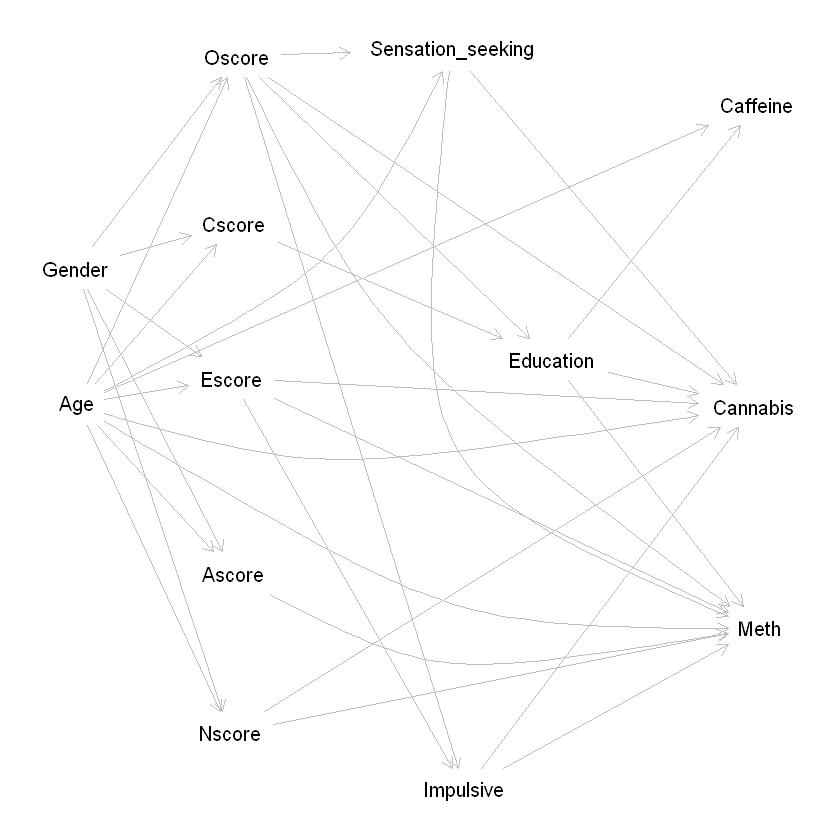

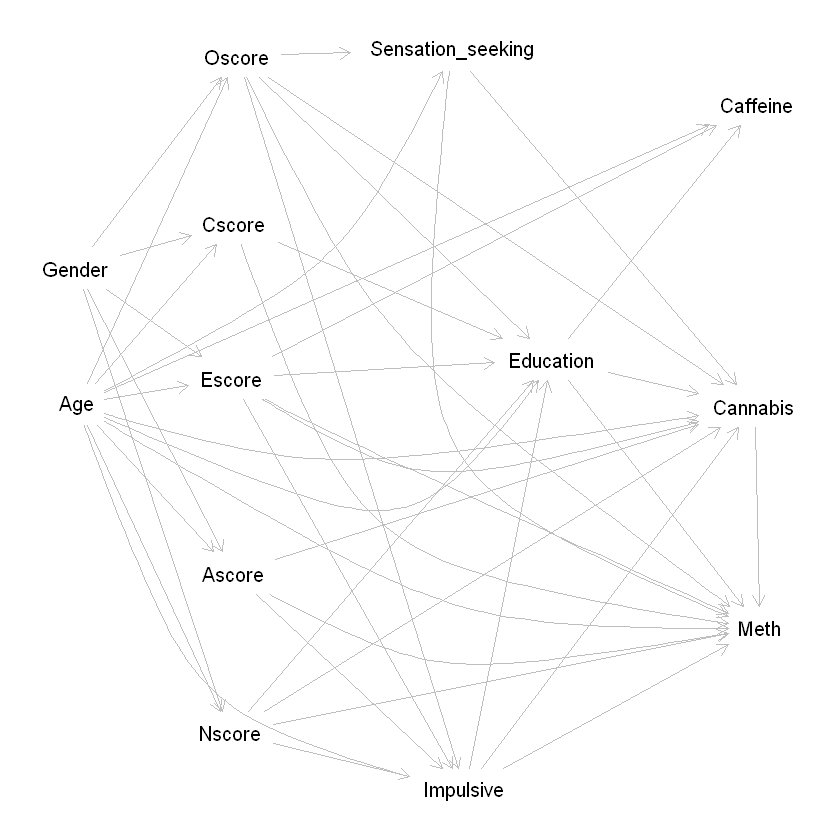

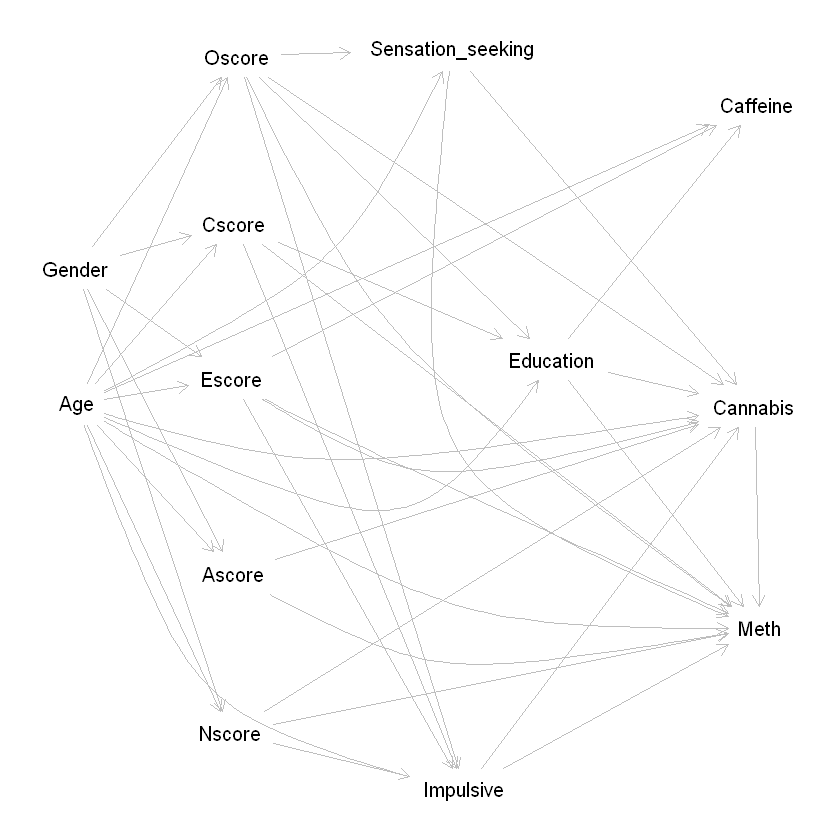

In [6]:
# Creating and plotting the DAGS (Only significant changes/versions are documented because of a space consideration)

# Version 1 which we are going to compare to the newer versions!

graph_v1 <- dagitty('dag {
bb="0,0,1,1"
Age [pos="0.140,0.493"]
Ascore [pos="0.268,0.602"]
Caffeine [pos="0.696,0.299"]
Cannabis [pos="0.694,0.494"]
Cscore [pos="0.269,0.376"]
Education [pos="0.528,0.464"]
Escore [pos="0.266,0.476"]
Gender [pos="0.139,0.405"]
Impulsive [pos="0.457,0.742"]
Meth [pos="0.698,0.637"]
Nscore [pos="0.265,0.705"]
Oscore [pos="0.271,0.268"]
Sensation_seeking [pos="0.447,0.264"]
Age -> Ascore
Age -> Caffeine
Age -> Cannabis [pos="0.332,0.543"]
Age -> Cscore
Age -> Escore
Age -> Meth [pos="0.450,0.644"]
Age -> Nscore
Age -> Oscore
Age -> Sensation_seeking [pos="0.366,0.404"]
Ascore -> Meth [pos="0.429,0.676"]
Cscore -> Education
Education -> Caffeine
Education -> Cannabis
Education -> Meth
Escore -> Cannabis
Escore -> Impulsive
Escore -> Meth
Gender -> Ascore
Gender -> Cscore
Gender -> Escore
Gender -> Nscore
Gender -> Oscore
Impulsive -> Cannabis
Impulsive -> Meth
Nscore -> Cannabis
Nscore -> Meth
Oscore -> Cannabis
Oscore -> Education
Oscore -> Impulsive
Oscore -> Meth [pos="0.376,0.454"]
Oscore -> Sensation_seeking
Sensation_seeking -> Cannabis
Sensation_seeking -> Meth [pos="0.393,0.550"]
}')

# Version 2 which we are going to compare to a older and newer version!

graph_v2 <- dagitty('dag {
bb="0,0,1,1"
Age [pos="0.140,0.493"]
Ascore [pos="0.268,0.602"]
Caffeine [pos="0.696,0.299"]
Cannabis [pos="0.694,0.494"]
Cscore [pos="0.269,0.376"]
Education [pos="0.528,0.464"]
Escore [pos="0.266,0.476"]
Gender [pos="0.139,0.405"]
Impulsive [pos="0.457,0.742"]
Meth [pos="0.698,0.637"]
Nscore [pos="0.265,0.705"]
Oscore [pos="0.271,0.268"]
Sensation_seeking [pos="0.447,0.264"]
Age -> Ascore
Age -> Caffeine
Age -> Cannabis [pos="0.332,0.543"]
Age -> Cscore
Age -> Education [pos="0.421,0.597"]
Age -> Escore
Age -> Impulsive [pos="0.228,0.699"]
Age -> Meth [pos="0.450,0.644"]
Age -> Nscore
Age -> Oscore
Age -> Sensation_seeking [pos="0.366,0.404"]
Ascore -> Cannabis
Ascore -> Impulsive
Ascore -> Meth [pos="0.429,0.676"]
Cannabis -> Meth
Cscore -> Education
Cscore -> Meth [pos="0.357,0.605"]
Education -> Caffeine
Education -> Cannabis
Education -> Meth
Escore -> Caffeine
Escore -> Cannabis [pos="0.416,0.556"]
Escore -> Education
Escore -> Impulsive
Escore -> Meth [pos="0.317,0.501"]
Gender -> Ascore
Gender -> Cscore
Gender -> Escore
Gender -> Nscore
Gender -> Oscore
Impulsive -> Cannabis
Impulsive -> Education
Impulsive -> Meth
Nscore -> Cannabis
Nscore -> Education
Nscore -> Impulsive
Nscore -> Meth
Oscore -> Cannabis
Oscore -> Education
Oscore -> Impulsive
Oscore -> Meth [pos="0.376,0.454"]
Oscore -> Sensation_seeking
Sensation_seeking -> Cannabis
Sensation_seeking -> Meth [pos="0.393,0.550"]
}
')

# Version 3 which we are going to compare to a older versions!

graph_v3 <- dagitty('dag {
bb="0,0,1,1"
Age [pos="0.140,0.493"]
Ascore [pos="0.268,0.602"]
Caffeine [pos="0.696,0.299"]
Cannabis [pos="0.694,0.494"]
Cscore [pos="0.269,0.376"]
Education [pos="0.528,0.464"]
Escore [pos="0.266,0.476"]
Gender [pos="0.139,0.405"]
Impulsive [pos="0.457,0.742"]
Meth [pos="0.698,0.637"]
Nscore [pos="0.265,0.705"]
Oscore [pos="0.271,0.268"]
Sensation_seeking [pos="0.447,0.264"]
Age -> Ascore
Age -> Caffeine
Age -> Cannabis [pos="0.332,0.543"]
Age -> Cscore
Age -> Education [pos="0.421,0.597"]
Age -> Escore
Age -> Impulsive [pos="0.228,0.699"]
Age -> Meth [pos="0.450,0.644"]
Age -> Nscore
Age -> Oscore
Age -> Sensation_seeking [pos="0.366,0.404"]
Ascore -> Cannabis
Ascore -> Meth [pos="0.429,0.676"]
Cannabis -> Meth
Cscore -> Education
Education -> Caffeine
Education -> Cannabis
Education -> Meth
Escore -> Caffeine
Escore -> Cannabis [pos="0.416,0.556"]
Escore -> Impulsive
Escore -> Meth [pos="0.317,0.501"]
Gender -> Ascore
Gender -> Cscore
Gender -> Escore
Gender -> Nscore
Gender -> Oscore
Impulsive -> Cannabis
Impulsive -> Meth
Nscore -> Cannabis
Nscore -> Impulsive
Nscore -> Meth
Oscore -> Cannabis
Oscore -> Education
Oscore -> Impulsive
Oscore -> Meth [pos="0.376,0.454"]
Oscore -> Sensation_seeking
Sensation_seeking -> Cannabis
Sensation_seeking -> Meth [pos="0.393,0.550"]
Cscore -> Impulsive
Cscore -> Meth
}
')

plot(graph_v1)
plot(graph_v2)
plot(graph_v3)

In [7]:
# Inspecting the test statistics of the implied conditional independencies of the version 1 graph

localTests( graph_v1, sample.cov=M, sample.nobs=nrow(df),max.conditioning.variable=3 )

,estimate,p.value,2.5%,97.5%
"Age _||_ Edct | Cscr, Oscr",0.15406406,1.654290e-11,0.1096558246,0.197879995
Age _||_ Gndr,-0.12196667,1.051249e-07,-0.1662084680,-0.077243747
"Age _||_ Impl | Escr, Oscr",0.11330880,8.050409e-07,0.0684870077,0.157680739
"Ascr _||_ Cffn | Age, Edct",-0.02673221,2.463106e-01,-0.0718180478,0.018462521
"Ascr _||_ Cffn | Age, Cscr, Oscr",-0.01776349,4.412509e-01,-0.0628975059,0.027442979
"Ascr _||_ Cffn | Age, Gndr",-0.01844625,4.237681e-01,-0.0635657874,0.026748475
"Ascr _||_ Cnnb | Age, Gndr",-0.09294914,5.303219e-05,-0.1375473646,-0.047978167
"Ascr _||_ Cscr | Age, Gndr",0.21365624,5.015096e-21,0.1701353433,0.256430039
"Ascr _||_ Edct | Cscr, Oscr",0.02916819,2.058493e-01,-0.0160253605,0.074242954
"Ascr _||_ Edct | Age, Gndr",0.04397682,5.638862e-02,-0.0011979956,0.088972880


In [8]:
# Inspecting the test statistics of the implied conditional independencies of the version 2 graph

localTests( graph_v2, sample.cov=M, sample.nobs=nrow(df), max.conditioning.variable=3)

,estimate,p.value,2.5%,97.5%
Age _||_ Gndr,-0.121966672,1.051249e-07,-0.1662084680,-0.077243747
"Ascr _||_ Cffn | Age, Edct, Escr",-0.034055052,1.397373e-01,-0.0791179535,0.011146538
"Ascr _||_ Cscr | Age, Gndr",0.213656236,5.015096e-21,0.1701353433,0.256430039
"Ascr _||_ Escr | Age, Gndr",0.151378259,3.729570e-11,0.1069380088,0.195234935
"Ascr _||_ Nscr | Age, Gndr",-0.233131911,7.216289e-25,-0.2755125397,-0.189976666
"Ascr _||_ Oscr | Age, Gndr",0.077177270,7.994230e-04,0.0321168054,0.121926447
"Ascr _||_ Sns_ | Age, Oscr",-0.084400012,2.442412e-04,-0.1290827242,-0.039377713
"Ascr _||_ Sns_ | Age, Gndr",-0.041921795,6.894932e-02,-0.0869299429,0.003256808
"Cffn _||_ Cnnb | Age, Edct, Escr",0.112431353,9.865463e-07,0.0675903777,0.156825502
"Cffn _||_ Cscr | Age, Edct, Escr",-0.061072952,8.033595e-03,-0.1059658689,-0.015932481


In [9]:
# Inspecting the test statistics of the implied conditional independencies of the version 3 graph

localTests( graph_v3, sample.cov=M, sample.nobs=nrow(df),max.conditioning.variable=3 )

,estimate,p.value,2.5%,97.5%
Age _||_ Gndr,-0.121966672,1.051249e-07,-0.1662084680,-0.077243747
"Ascr _||_ Cffn | Age, Edct, Escr",-0.034055052,1.397373e-01,-0.0791179535,0.011146538
"Ascr _||_ Cffn | Age, Gndr",-0.018446250,4.237681e-01,-0.0635657874,0.026748475
"Ascr _||_ Cscr | Age, Gndr",0.213656236,5.015096e-21,0.1701353433,0.256430039
"Ascr _||_ Edct | Age, Cscr, Oscr",0.024756209,2.831198e-01,-0.0204511059,0.069862610
"Ascr _||_ Edct | Age, Gndr",0.043976820,5.638862e-02,-0.0011979956,0.088972880
"Ascr _||_ Escr | Age, Gndr",0.151378259,3.729570e-11,0.1069380088,0.195234935
"Ascr _||_ Impl | Age, Gndr",0.152453847,2.697959e-11,0.1080263354,0.196294274
"Ascr _||_ Nscr | Age, Gndr",-0.233131911,7.216289e-25,-0.2755125397,-0.189976666
"Ascr _||_ Oscr | Age, Gndr",0.077177270,7.994230e-04,0.0321168054,0.121926447


In [10]:
# Inspecting both the fit summaries

print("v1")
fit_v1 <- sem( toString(graph_v1,"lavaan"), sample.cov=M, sample.nobs=nrow(df),estimator="ML", auto.cov.lv.x=FALSE ) # Estimating using maximum likelihood
summary(fit_v1)

print("v2")
fit_v2 <- sem( toString(graph_v2,"lavaan"), sample.cov=M, sample.nobs=nrow(df),estimator="ML", auto.cov.lv.x=FALSE  ) # Estimating using maximum likelihood
summary(fit_v2)

print("v3")
fit_v3 <- sem( toString(graph_v3,"lavaan"), sample.cov=M, sample.nobs=nrow(df),estimator="ML", auto.cov.lv.x=FALSE  ) # Estimating using maximum likelihood
summary(fit_v3)

[1] "Old fit"
lavaan 0.6-7 ended normally after 20 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of free parameters                         47
                                                      
  Number of observations                          1885
                                                      
Model Test User Model:
                                                      
  Test statistic                              1708.515
  Degrees of freedom                                41
  P-value (Chi-square)                           0.000

Parameter Estimates:

  Standard errors                             Standard
  Information                                 Expected
  Information saturated (h1) model          Structured

Regressions:
                      Estimate  Std.Err  z-value  P(>|z|)
  Ascore ~                                               
    Age                  0.044    0.023    1.9

[1] "Newest fit"
lavaan 0.6-7 ended normally after 18 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of free parameters                         53
                                                      
  Number of observations                          1885
                                                      
Model Test User Model:
                                                      
  Test statistic                              1424.606
  Degrees of freedom                                35
  P-value (Chi-square)                           0.000

Parameter Estimates:

  Standard errors                             Standard
  Information                                 Expected
  Information saturated (h1) model          Structured

Regressions:
                      Estimate  Std.Err  z-value  P(>|z|)
  Ascore ~                                               
    Age                  0.044    0.023    

In [15]:
anova(fit_v1, fit_v2) # We can see here that the old fit is scoring worse (AIC is higher --> worse)

anova(fit_v1, fit_v3) # We can see here that the old fit is scoring worse (AIC is higher --> worse)

# AIC penalizes models with more parameters and the old fit has less parameters but still a higher score

# This test statistic combined with our own assumption will lead to using fit_v2 for estimating the path coefficients

# anova(fit_v2, fit_v3)

,Df,AIC,BIC,Chisq,Chisq diff,Df diff,Pr(>Chisq)
fit_v2,32,56371.34,56681.68,1519.381,NA,NA,NA
fit_v1,41,56542.48,56802.94,1708.515,189.134,9,6.247562e-36


,Df,AIC,BIC,Chisq,Chisq diff,Df diff,Pr(>Chisq)
fit_v3,35,56270.57,56564.28,1424.606,NA,NA,NA
fit_v1,41,56542.48,56802.94,1708.515,283.9085,6,2.287952e-58
